In [1]:
!pip install webcolors==1.3
import webcolors
from PIL import Image, ImageDraw
import argparse
import sys
import time
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

  Created wheel for webcolors: filename=webcolors-1.3-cp37-none-any.whl size=13010 sha256=249912a64c8b0408645f7fd5c2949063df593fa0e22ac73d61a4832ba0d55212
  Stored in directory: /root/.cache/pip/wheels/f5/5c/6d/fe4a555c7072e9637a6e1bfc40a9e6736a6f567dec50c8c33b
Successfully built webcolors


In [2]:
def get_colors(image_file, numcolors=1, resize=150):
    # Resize image to speed up processing
    img = Image.open(image_file)
    img.thumbnail((resize, resize))

    # Reduce to palette
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=numcolors)

    # Find dominant colors
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    print(color_counts)
    colors = list()
    for i in range(numcolors):
        palette_index = color_counts[i][1]
        dominant_color = palette[palette_index*3:palette_index*3+3]
        #rgb to hex color 
        #dominant_color = webcolors.rgb_to_hex(tuple(dominant_color))
        colors.append(dominant_color)

    return colors

In [3]:
def show_dominant_colors(arr):
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    steps = 300 / arr.shape[0]
    for idx, ele in enumerate(arr):
        color_deck[:, int(idx*steps):(int((idx+1)*steps)), :] = ele
    return color_deck

[(18750, 0)]
Time for Prediction : 0.012
actual image size (220, 264)
colors present in img  [[28, 28, 42]]


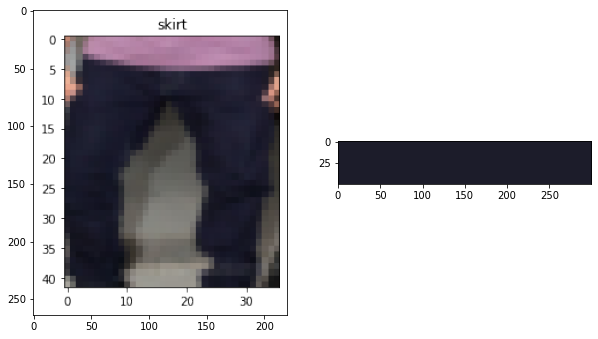

In [6]:
def display_output(img_path):
  t = time.time()
  pred_colors = get_colors(img_path)
  print("Time for Prediction : {:.3f}".format(time.time() - t))

  f = plt.figure(figsize=(10,7))
  f.add_subplot(1, 2, 1)
  img = Image.open(img_path)
  print("actual image size", img.size)
  imshow(np.asarray(img))
  print("colors present in img ",pred_colors)

  f.add_subplot(1, 2, 2)
  pred_colors = np.array(pred_colors)
  imshow(show_dominant_colors(pred_colors))

display_output("/content/download (5).png")